# Explore the credit data

Checking the structure of the data as well as seeing a snapshot helps us better understand what's inside the set. Similarly, visualizations provide a high level view of the data in addition to important trends and patterns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
cr_loan = pd.read_csv("cr_loan2.csv")
cr_loan.shape

(32581, 12)

In [3]:
# Structure of the data
print(cr_loan.dtypes)

print('\n')

# First five rows of the data
print(cr_loan.head())

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL         

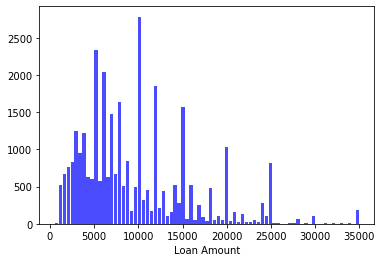

In [4]:
# Distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

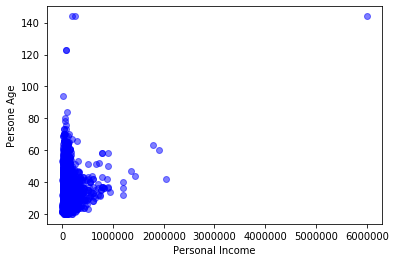

In [5]:
# Scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

# Crosstab and pivot tables

Often, financial data is viewed as a pivot table in spreadsheets like Excel.

For most credit risk models, especially for probability of default, columns like *person_emp_length* and *person_home_ownership* are common to begin investigating.

In [6]:
# Cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins=True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [7]:
# Cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [8]:
# Cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


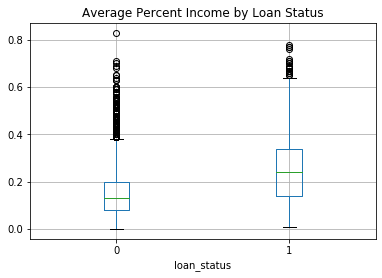

In [9]:
# Box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.

# Finding outliers with cross tables

In [10]:
# Cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [11]:
# Array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


Generally with credit data, key columns like *person_emp_length* are of high quality, but there is always room for error. With this in mind, we build our intuition for detecting outliers!

# Visualizing credit outliers

We discovered outliers in *person_emp_length* where values greater than 60 were far above the norm. *person_age* is another column in which a person can use a common sense approach to say it is very unlikely that a person applying for a loan will be over 100 years old.

Visualizing the data here can be another easy way to detect outliers. We can use other numeric columns like *loan_amnt* and *loan_int_rate* to create plots with *person_age* to search for outliers.

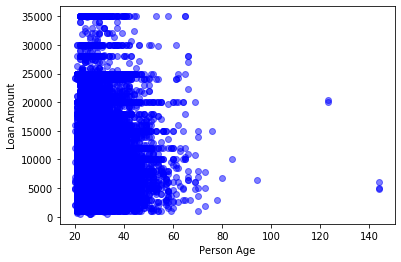

In [12]:
# Scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

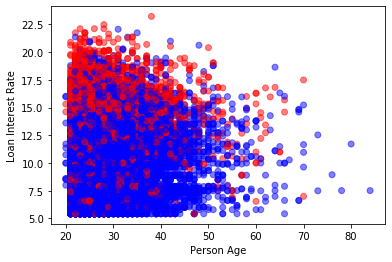

In [13]:
# Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

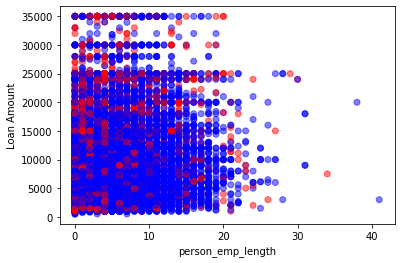

In [14]:
# Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_emp_length'] > 100].index)

# Scatter plot of employee length and loan amount
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_emp_length'], cr_loan_new['loan_amnt'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("person_emp_length")
plt.ylabel("Loan Amount")
plt.show()

It looks like there are more defaults with high interest rates.

# Replacing missing credit data

We should check for missing data. If we find missing data within loan_status, we would not be able to use the data for predicting probability of default because we wouldn't know if the loan was a default or not. Missing data within *person_emp_length* would not be as damaging, but would still cause training errors.

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

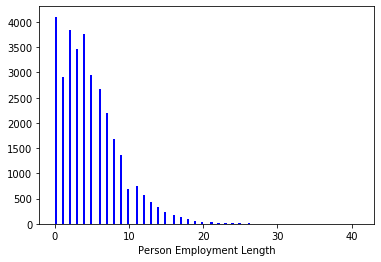

In [15]:
# Print a null value column array
print(cr_loan_new.columns[cr_loan_new.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan_new[cr_loan_new['person_emp_length'].isnull()].head())

# Impute the null values with the median value for all employment lengths
cr_loan_new['person_emp_length'].fillna((cr_loan_new['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan_new['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

# Removing missing data

Because interest rates are set by our company, having missing data in this column is very strange. It's possible that data ingestion issues created errors, but we cannot know for sure. For now, it's best to *.drop()* these records before moving forward.

In [16]:
# Print the number of nulls
print(cr_loan_new['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan_new[cr_loan_new['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan_new.drop(indices)

3116


In [17]:
cr_loan_clean.to_csv('cr_loan_clean.csv')